In [1]:
import pandas as pd

# Load the data
file_path = "rotation.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()

,8,2025-02-24T15:04:19.8280192+00:00,0.773554027,-5.55578995,0,0.1,3.07506061,202502241504199992,2025-02-24T15:04:20.0012800+00:00,0.2,Diagonal,0.3,Vertical,0.4,Circle,0.5,0.6
0,8,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,3.075061,202502241504199992,2025-02-24T15:04:20.0161152+00:00,0,Diagonal,0,Vertical,0,Circle,0,0
1,8,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,3.075061,202502241504199992,2025-02-24T15:04:20.0161536+00:00,0,Diagonal,0,Vertical,0,Circle,0,0
2,8,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,3.075061,202502241504199992,2025-02-24T15:04:20.0161536+00:00,0,Diagonal,0,Vertical,0,Circle,0,0
3,8,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,3.075061,202502241504199992,2025-02-24T15:04:20.0161536+00:00,0,Diagonal,0,Vertical,0,Circle,0,0
4,8,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,3.075061,202502241504199992,2025-02-24T15:04:20.0161536+00:00,0,Diagonal,0,Vertical,0,Circle,0,0


In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Drop the first column since it does not matter
#df = df.iloc[:, 1:6]
df = df.iloc[:, list(range(1, 6)) + list(range(9, 15))]
df.head()



,2025-02-24T15:04:19.8280192+00:00,0.773554027,-5.55578995,0,0.1,0.2,Diagonal,0.3,Vertical,0.4,Circle
0,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle
1,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle
2,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle
3,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle
4,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle


In [3]:
# Rename columns for clarity
df.columns = ["datetime", "x_position", "z_position", "x_velocity", "z_velocity", "Diagonal_value", "Diagonal", "Vertical_value", "Vertical", "Circle_value", "Circle"]


In [4]:
df.head()

,datetime,x_position,z_position,x_velocity,z_velocity,Diagonal_value,Diagonal,Vertical_value,Vertical,Circle_value,Circle
0,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle
1,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle
2,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle
3,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle
4,2025-02-24T15:04:19.8280192+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle


In [5]:
# Convert datetime column to a proper datetime format
df["datetime"] = pd.to_datetime(df["datetime"])

In [6]:
df.head()

,datetime,x_position,z_position,x_velocity,z_velocity,Diagonal_value,Diagonal,Vertical_value,Vertical,Circle_value,Circle
0,2025-02-24 15:04:19.828019200+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle
1,2025-02-24 15:04:19.828019200+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle
2,2025-02-24 15:04:19.828019200+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle
3,2025-02-24 15:04:19.828019200+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle
4,2025-02-24 15:04:19.828019200+00:00,0.773554,-5.55579,0.0,0.0,0,Diagonal,0,Vertical,0,Circle


In [7]:
# Calculate seconds since the experiment start
df["seconds_since_start"] = (df["datetime"] - df["datetime"].min()).dt.total_seconds()


In [8]:
import numpy as np
# Calculate displacement using the PyRat method
df["displacement_unit"] = np.hypot(
    np.diff(df["x_position"], prepend=df["x_position"].iloc[0]), 
    np.diff(df["z_position"], prepend=df["z_position"].iloc[0])
)


In [9]:
df.head(1000)

,datetime,x_position,z_position,x_velocity,z_velocity,Diagonal_value,Diagonal,Vertical_value,Vertical,Circle_value,Circle,seconds_since_start,displacement_unit
0,2025-02-24 15:04:19.828019200+00:00,0.773554,-5.555790,0.0,0.0,0,Diagonal,0,Vertical,0,Circle,0.000000,0.0
1,2025-02-24 15:04:19.828019200+00:00,0.773554,-5.555790,0.0,0.0,0,Diagonal,0,Vertical,0,Circle,0.000000,0.0
2,2025-02-24 15:04:19.828019200+00:00,0.773554,-5.555790,0.0,0.0,0,Diagonal,0,Vertical,0,Circle,0.000000,0.0
3,2025-02-24 15:04:19.828019200+00:00,0.773554,-5.555790,0.0,0.0,0,Diagonal,0,Vertical,0,Circle,0.000000,0.0
4,2025-02-24 15:04:19.828019200+00:00,0.773554,-5.555790,0.0,0.0,0,Diagonal,0,Vertical,0,Circle,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-02-24 15:04:22.348928+00:00,0.774177,-5.564796,0.0,0.0,0,Diagonal,0,Vertical,0,Circle,2.520909,0.0
996,2025-02-24 15:04:22.348928+00:00,0.774177,-5.564796,0.0,0.0,0,Diagonal,0,Vertical,0,Circle,2.520909,0.0
997,2025-02-24 15:04:22.348928+00:00,0.774177,-5.564796,0.0,0.0,0,Diagonal,0,Vertical,0,Circle,2.520909,0.0
998,2025-02-24 15:04:22.348928+00:00,0.774177,-5.564796,0.0,0.0,0,Diagonal,0,Vertical,0,Circle,2.520909,0.0


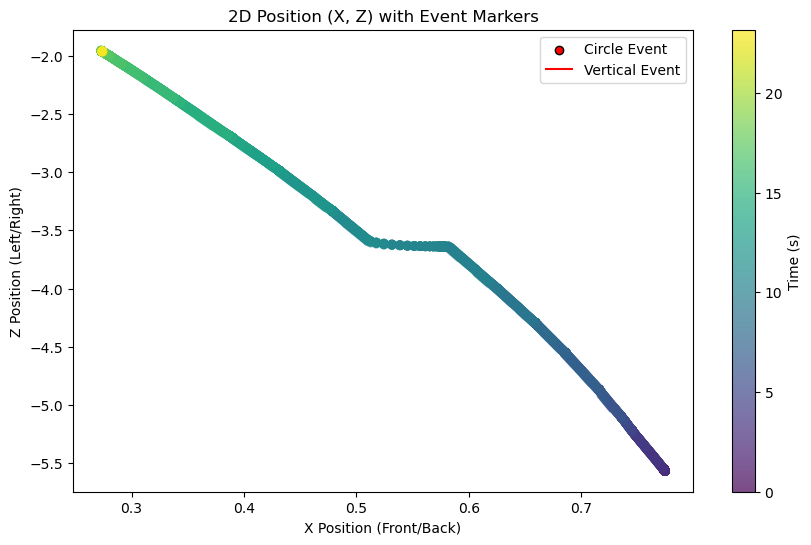

In [10]:
# Identify instances where the value changes from 0 to 1 (event onset detection)
df["Circle_onset"] = (df["Circle_value"].diff() == 1)
df["Vertical_onset"] = (df["Vertical_value"].diff() == 1)
df["Diagonal_onset"] = (df["Diagonal_value"].diff() == 1)

# Filter for event onset instances
circle_events = df[df["Circle_onset"]]
vertical_events = df[df["Vertical_onset"]]
diagonal_events = df[df["Diagonal_onset"]]

# Create the scatter plot with event markers
plt.figure(figsize=(10, 6))
sc = plt.scatter(df["x_position"], df["z_position"], c=df["seconds_since_start"], cmap="viridis", alpha=0.7)

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label("Time (s)")

# Add event markers at transition points (0 → 1)
plt.scatter(circle_events["x_position"], circle_events["z_position"], color="red", marker="o", label="Circle Event", edgecolors="black")
plt.vlines(vertical_events["x_position"], ymin=vertical_events["z_position"] - 0.5, ymax=vertical_events["z_position"] + 0.5, color="red", label="Vertical Event")

for _, row in diagonal_events.iterrows():
    plt.plot([row["x_position"] - 0.5, row["x_position"] + 0.5],
             [row["z_position"] - 0.5, row["z_position"] + 0.5], color="red", label="Diagonal Event")

# Labels and title
plt.xlabel("X Position (Front/Back)")
plt.ylabel("Z Position (Left/Right)")
plt.title("2D Position (X, Z) with Event Markers")

# Add legend
plt.legend()

# Show plot
plt.show()



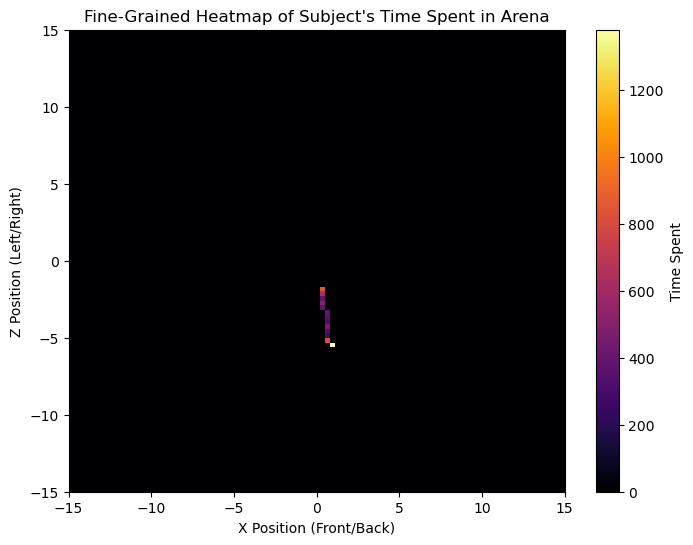

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the arena boundaries and finer bins
x_bins = np.linspace(-15, 15, 100)  # 100 bins for x-axis (higher resolution)
z_bins = np.linspace(-15, 15, 100)  # 100 bins for z-axis (higher resolution)

# Compute a 2D histogram for heatmap
heatmap, x_edges, z_edges = np.histogram2d(df["x_position"], df["z_position"], bins=[x_bins, z_bins])

# Plot the heatmap using imshow
plt.figure(figsize=(8, 6))
plt.imshow(heatmap.T, cmap="inferno", origin="lower", extent=[-15, 15, -15, 15], aspect="auto")

# Labels and title
plt.xlabel("X Position (Front/Back)")
plt.ylabel("Z Position (Left/Right)")
plt.title("Fine-Grained Heatmap of Subject's Time Spent in Arena")
plt.colorbar(label="Time Spent")

# Show plot
plt.show()




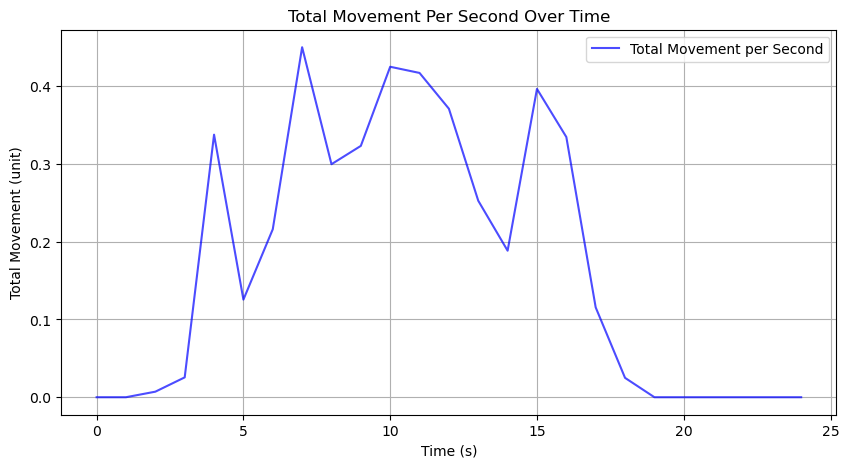

In [12]:
# Ensure datetime is properly formatted and set as index for resampling
df = df.set_index("datetime")

# Resample to 1-second intervals, summing total displacement within each second
df_resampled = df["displacement_unit"].resample("1S").sum().reset_index()

# Convert datetime to seconds since start
df_resampled["seconds_since_start"] = (df_resampled["datetime"] - df_resampled["datetime"].min()).dt.total_seconds()

# Drop datetime column as it's now redundant
df_resampled = df_resampled.drop(columns=["datetime"])

# Rename column for clarity
df_resampled.rename(columns={"displacement_unit": "total_movement_unit"}, inplace=True)

# Plot total movement per second over time
plt.figure(figsize=(10, 5))
plt.plot(df_resampled["seconds_since_start"], df_resampled["total_movement_unit"], color="blue", alpha=0.7, label="Total Movement per Second")

# Labels and title
plt.xlabel("Time (s)")
plt.ylabel("Total Movement (unit)")
plt.title("Total Movement Per Second Over Time")
plt.legend()
plt.grid()

# Show plot
plt.show()

/var/folders/3y/jmv30wb16ss901m1yrdysjh80000gq/T/ipykernel_74679/1184173960.py:12: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(diagonal_events["x_position"], diagonal_events["z_position"], color="red", marker="x", label="Diagonal Event", edgecolors="black")


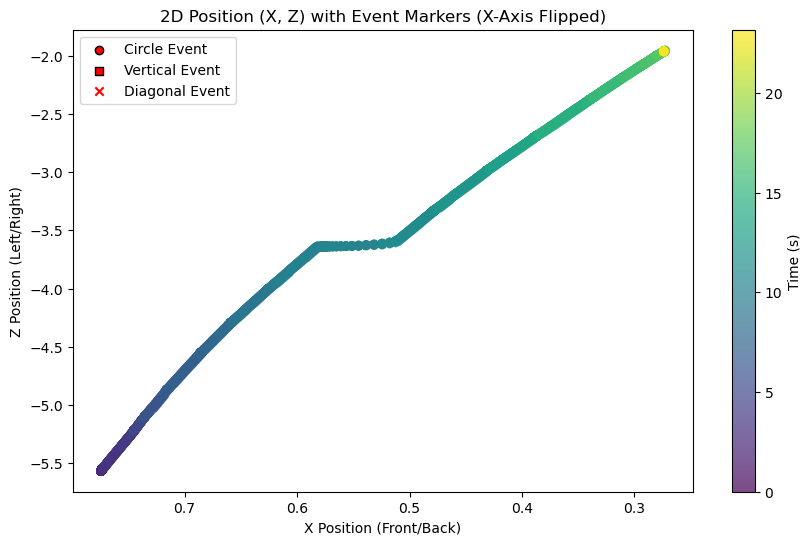

In [13]:
# Create the scatter plot with event markers and flipped x-axis
plt.figure(figsize=(10, 6))
sc = plt.scatter(df["x_position"], df["z_position"], c=df["seconds_since_start"], cmap="viridis", alpha=0.7)

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label("Time (s)")

# Add event markers at transition points (0 → 1) with specified icons
plt.scatter(circle_events["x_position"], circle_events["z_position"], color="red", marker="o", label="Circle Event", edgecolors="black")
plt.scatter(vertical_events["x_position"], vertical_events["z_position"], color="red", marker="s", label="Vertical Event", edgecolors="black")
plt.scatter(diagonal_events["x_position"], diagonal_events["z_position"], color="red", marker="x", label="Diagonal Event", edgecolors="black")

# Flip the x-axis
plt.gca().invert_xaxis()

# Labels and title
plt.xlabel("X Position (Front/Back)")
plt.ylabel("Z Position (Left/Right)")
plt.title("2D Position (X, Z) with Event Markers (X-Axis Flipped)")

# Add legend
plt.legend()

# Show plot
plt.show()


/var/folders/3y/jmv30wb16ss901m1yrdysjh80000gq/T/ipykernel_74679/3635505367.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(-diagonal_events["x_position"], diagonal_events["z_position"], color="red", marker="x", label="Diagonal Event", edgecolors="black")


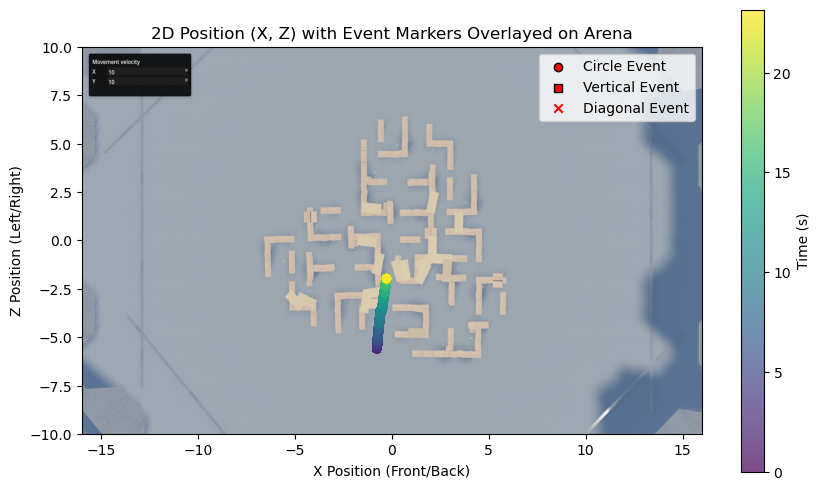

In [14]:
import matplotlib.pyplot as plt
import cv2

# Load the top-down arena image
arena_img = cv2.imread("arena_topdown.png")
arena_img = cv2.cvtColor(arena_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# **Fix Image Size (Constant, Independent of Tracks)**
#image_width = 36   # Set the fixed width of the image
#image_height = 24  # Set the fixed height of the image

# **Set the Fixed Position of the Image**
x_left = -16  # The left boundary of the image
x_right = 16  # The right boundary of the image
z_bottom = -10  # Bottom boundary of the image
z_top = 10  # Top boundary of the image

# **Create the figure with a fixed aspect ratio**
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_aspect("equal")  # Keep the aspect ratio equal to avoid distortion

# **Display the Arena Image with Fixed Dimensions**
plt.imshow(arena_img, extent=[x_left, x_right, z_bottom, z_top], aspect="auto")

# **Plot the Tracks (Flipped X but Original Scaling)**
sc = plt.scatter(-df["x_position"], df["z_position"], c=df["seconds_since_start"], cmap="viridis", alpha=0.7)

# **Add Colorbar**
cbar = plt.colorbar(sc)
cbar.set_label("Time (s)")

# **Plot Event Markers (Keeping Original Position)**
plt.scatter(-circle_events["x_position"], circle_events["z_position"], color="red", marker="o", label="Circle Event", edgecolors="black")
plt.scatter(-vertical_events["x_position"], vertical_events["z_position"], color="red", marker="s", label="Vertical Event", edgecolors="black")
plt.scatter(-diagonal_events["x_position"], diagonal_events["z_position"], color="red", marker="x", label="Diagonal Event", edgecolors="black")

# **Labels and Title**
plt.xlabel("X Position (Front/Back)")
plt.ylabel("Z Position (Left/Right)")
plt.title("2D Position (X, Z) with Event Markers Overlayed on Arena")

# **Keep Image Size Fixed While Ensuring Tracks Are Correctly Positioned**
plt.xlim(x_left, x_right)  # Fix x-axis limits
plt.ylim(z_bottom, z_top)  # Fix y-axis limits
plt.gca().set_aspect("equal")  # Maintain a 1:1 aspect ratio

# **Add Legend**
plt.legend()

# **Show the final overlayed plot**
plt.show()


In [17]:
#Total length moved

import pandas as pd


# Compute the total change in z_position
total_change_z = df['z_position'].iloc[-1] - df['z_position'].iloc[0]

print("Total change in z_position:", total_change_z)


Total change in z_position: 3.5928034800000006
